### Numpy basics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [2]:
m = np.arange(12).reshape((3,4))
print("Matrix:\n", m)
column_mean  = m.mean(axis=0)
row_mean     = m.mean(axis=1)
overall_mean = m.mean()
print("Columns means:", column_mean)
print("Rows means:", row_mean)
print("Overall mean:", overall_mean)

Matrix:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Columns means: [4. 5. 6. 7.]
Rows means: [1.5 5.5 9.5]
Overall mean: 5.5


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [3]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

uv_numpy = np.outer(u, v)
uv_nest  = np.zeros((4, 4))
for i in range(4):
    for j in range(4):
        uv_nest[i, j] = u[i]*v[j]
uv_broad = u.reshape(4,1) * v

print("u =", u)
print("v =", v)
print("\n u x v (numpy):\n", uv_numpy)
print("\n u x v (nested for):\n", uv_numpy)
print("\n u x v (broadcasting):\n", uv_broad)

u = [1 3 5 7]
v = [2 4 6 8]

 u x v (numpy):
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]

 u x v (nested for):
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]

 u x v (broadcasting):
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [4]:
np.random.seed(1205462)
matrix = np.random.rand(10, 6)
print("Original matrix:\n", matrix)
'''
mask = (matrix < 0.1)
matrix[mask] = 0
'''
matrix[matrix < 0.1] = 0
print("\n Modified matrix:\n", matrix)

Original matrix:
 [[0.70153468 0.95528881 0.42332332 0.79201893 0.18444041 0.25005114]
 [0.57762899 0.03373634 0.95721932 0.24592308 0.0904648  0.99342662]
 [0.13914975 0.6708865  0.60075701 0.18820787 0.02414023 0.8792195 ]
 [0.43035614 0.20369083 0.99005009 0.61874039 0.22509124 0.6379903 ]
 [0.4233683  0.53101354 0.79228065 0.94605241 0.83639504 0.96620362]
 [0.3242917  0.18535955 0.19764744 0.07359193 0.94584591 0.10502521]
 [0.27299359 0.27243424 0.22055798 0.13000527 0.55382615 0.31301619]
 [0.77606513 0.65697247 0.44436671 0.16970663 0.09211541 0.55209111]
 [0.15424051 0.64803174 0.81702563 0.45796168 0.72474236 0.96037358]
 [0.60534877 0.0927423  0.72556918 0.08962668 0.05839984 0.68910775]]

 Modified matrix:
 [[0.70153468 0.95528881 0.42332332 0.79201893 0.18444041 0.25005114]
 [0.57762899 0.         0.95721932 0.24592308 0.         0.99342662]
 [0.13914975 0.6708865  0.60075701 0.18820787 0.         0.8792195 ]
 [0.43035614 0.20369083 0.99005009 0.61874039 0.22509124 0.63799

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (inclusive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

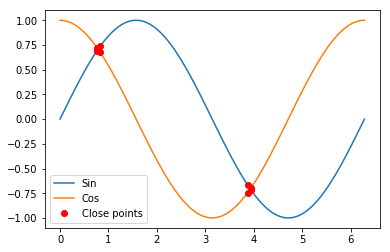

In [5]:
array = np.linspace(0, 2*np.pi, 100)
slice_array   = array[::10]
reverse_array = array[::-1]
diff_array = array[abs(np.sin(array) - np.cos(array)) < 0.1]
'''
print("Original array:", array)
print("\n Sliced array:", slice_array)
print("\n Reverse array:", reverse_array)
print("\n Sin/Cos difference array:", diff_array)
'''
plt.plot(array, np.sin(array), label="Sin")
plt.plot(array, np.cos(array), label="Cos")
plt.plot(diff_array, np.cos(diff_array), 'ro', label="Close points")
plt.plot(diff_array, np.sin(diff_array), 'ro')
plt.legend()

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [6]:
a = np.arange(1,11)
matrix = a.reshape(10,1) * a
trace = matrix.trace()
antidiag = np.diagonal(np.fliplr(matrix))
diag_1off = np.diagonal(matrix, 1)
print("10x10 multiplication table:\n", matrix)
print("Trace:", trace)
print("Anti-diagonal:", antidiag)
print("Diagonal offset by +1:", diag_1off)

10x10 multiplication table:
 [[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
Trace: 385
Anti-diagonal: [10 18 24 28 30 30 28 24 18 10]
Diagonal offset by +1: [ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [7]:
position = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
distance = abs(position.reshape(len(position), 1) - position)
km_distance = distance * 1.61
print("Distances in miles:\n", distance)
print("\n Distances in km:\n", km_distance)

Distances in miles:
 [[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]

 Distances in km:
 [[   0.    318.78  487.83 1184.96 1402.31 1891.75 2374.75 2485.84 3079.93
  3941.28]
 [ 318.78    0.    169.05  866.18 1083.53 1572.97 2055.97 2167.06 2761.15
  3622.5 ]
 [ 487.83  169.05    0.    697.13  914.48 1403.92 1886.92 1998.01 2592.1
  3453.45]
 [1184.96  866.18  697.13    0.    217.35  706.79 1189.79 1300.88 1894.97
  2756.32]
 [1402.31 1083.53  914.48  217.35    0.    489.44  972.44 1083.53 1677.62
  2538.97]
 [18

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

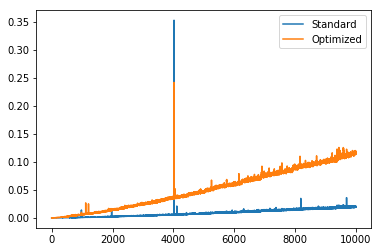

In [8]:
import timeit

def find_prime(N):
    number_list = np.ones(N, bool)
    Nmax = int(N**0.5) + 1
    for i in range(2, Nmax):
        if number_list[i] == True:
            for n in range(2, N):
                j = n*i
                if j < N:
                    number_list[j] = False
    return np.nonzero(number_list)

def find_prime_opt(N):
    number_list = np.ones(N, bool)
    Nmax = int(N**0.5) + 1
    for i in range(2, Nmax):
        if number_list[i] == True:
            for n in range(2, N):
                j = i**2 + n*i
                if j < N:
                    number_list[j] = False
    return np.nonzero(number_list)


#print(find_prime(99))
numbers = []
time_std = []
time_opt = []
for N in range(0, 10000):
    t_std = timeit.timeit('find_prime(N)', number = 1, globals = globals())
    t_opt = timeit.timeit('find_prime_opt(N)', number = 1, globals = globals())
    numbers.append(N)
    time_std.append(t_std)
    time_opt.append(t_opt)

plt.plot(numbers, time_std, label="Standard")
plt.plot(numbers, time_opt, label="Optimized")
plt.legend()

8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

Text(0.5, 0, 'Time')

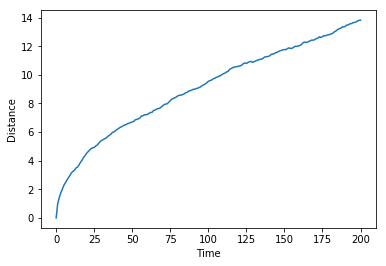

In [9]:
np.random.seed(11112018)
n_walkers = 1000
n_steps = 200
# generate random numbers uniform distributed in [0, 1)
jumps = np.random.rand(n_walkers, n_steps)
# since jumps can be +-1:
#   if(num <  0.5) -> set to -1
#   if(num >= 0.5) -> set to +1
jumps[jumps <  0.5] = -1
jumps[jumps >= 0.5] =  1
# create the matrix for the distances (one more column for starting position x=0)
distance = np.zeros((n_walkers, n_steps+1))
# update the position, summing the jump to the previous position
for i in range(0, n_steps):
    distance[:, i+1] = distance[:, i] + jumps[:, i]
# get the actual distance from the starting position (x = 0) in each step
distance = abs(distance)
# mean distance for each step (mean over columns)
mean = np.mean(distance**2, axis=0)**0.5

plt.plot(mean)
plt.ylabel("Distance")
plt.xlabel("Time")

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

In [10]:
data = np.loadtxt("./populations.txt")
print(data)

[[ 1900. 30000.  4000. 48300.]
 [ 1901. 47200.  6100. 48200.]
 [ 1902. 70200.  9800. 41500.]
 [ 1903. 77400. 35200. 38200.]
 [ 1904. 36300. 59400. 40600.]
 [ 1905. 20600. 41700. 39800.]
 [ 1906. 18100. 19000. 38600.]
 [ 1907. 21400. 13000. 42300.]
 [ 1908. 22000.  8300. 44500.]
 [ 1909. 25400.  9100. 42100.]
 [ 1910. 27100.  7400. 46000.]
 [ 1911. 40300.  8000. 46800.]
 [ 1912. 57000. 12300. 43800.]
 [ 1913. 76600. 19500. 40900.]
 [ 1914. 52300. 45700. 39400.]
 [ 1915. 19500. 51100. 39000.]
 [ 1916. 11200. 29700. 36700.]
 [ 1917.  7600. 15800. 41800.]
 [ 1918. 14600.  9700. 43300.]
 [ 1919. 16200. 10100. 41300.]
 [ 1920. 24700.  8600. 47300.]]
